In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 💎 카드매출 인사이트 요약


## 일반 인사이트

1. 3업종 제외 모든 업종에서 감소 10% 이상씩 매출 감소 
2. 2020년 2월~5월 가장 많이 감소한 업종 Top5  : 의복(43%) 문화취미(38%), 숙박(35%), 신변잡화(33%), 사무통신(30%)
3. 2020년 2월~5월 증가한 업종 Top3 : 가구(16%), 전기(3%), 음료식품(3%) 


> * 가구 : 목재가구, 철재가구
> * 의복 : 남여기성복, 양복, 양품점, 내의류, 아동복, 캐주얼
> * 숙박 : 특급호텔, 1급호텔, 2급호텔, 콘도미니엄, 모텔,여관,기타숙박 
> * 신변잡화 : 제화점, 가방,핸드백(가죽),기성화(신발),시계점,귀금속,금,은,보석,자석요,온돌매트,옥매트,악세사리,성인용품판매점
> * 사무통신 : 사무기기, 정보통신기기, 컴퓨터, 컴퓨터소프트웨어


## 피트니스 인사이트

1. 레저업소 매출액 27% 감소, 레저 21% 감소 : 집합 운동 시설 방문 줄었다.

> * 레저 업소 : 실내골프장, 테니스장, 볼링장, 스키장, 수영장, 당구장, 노래방, 종합레저타운/놀이동산, 비디오방, 스포츠클럽, 카지노, 유선TV, 전자오락실,PC게임방 
> * 레저 용품 : 음반, 악기, 피아노, 운동경기,레져용품,레저스포츠,자전거 등 




# 정의서 
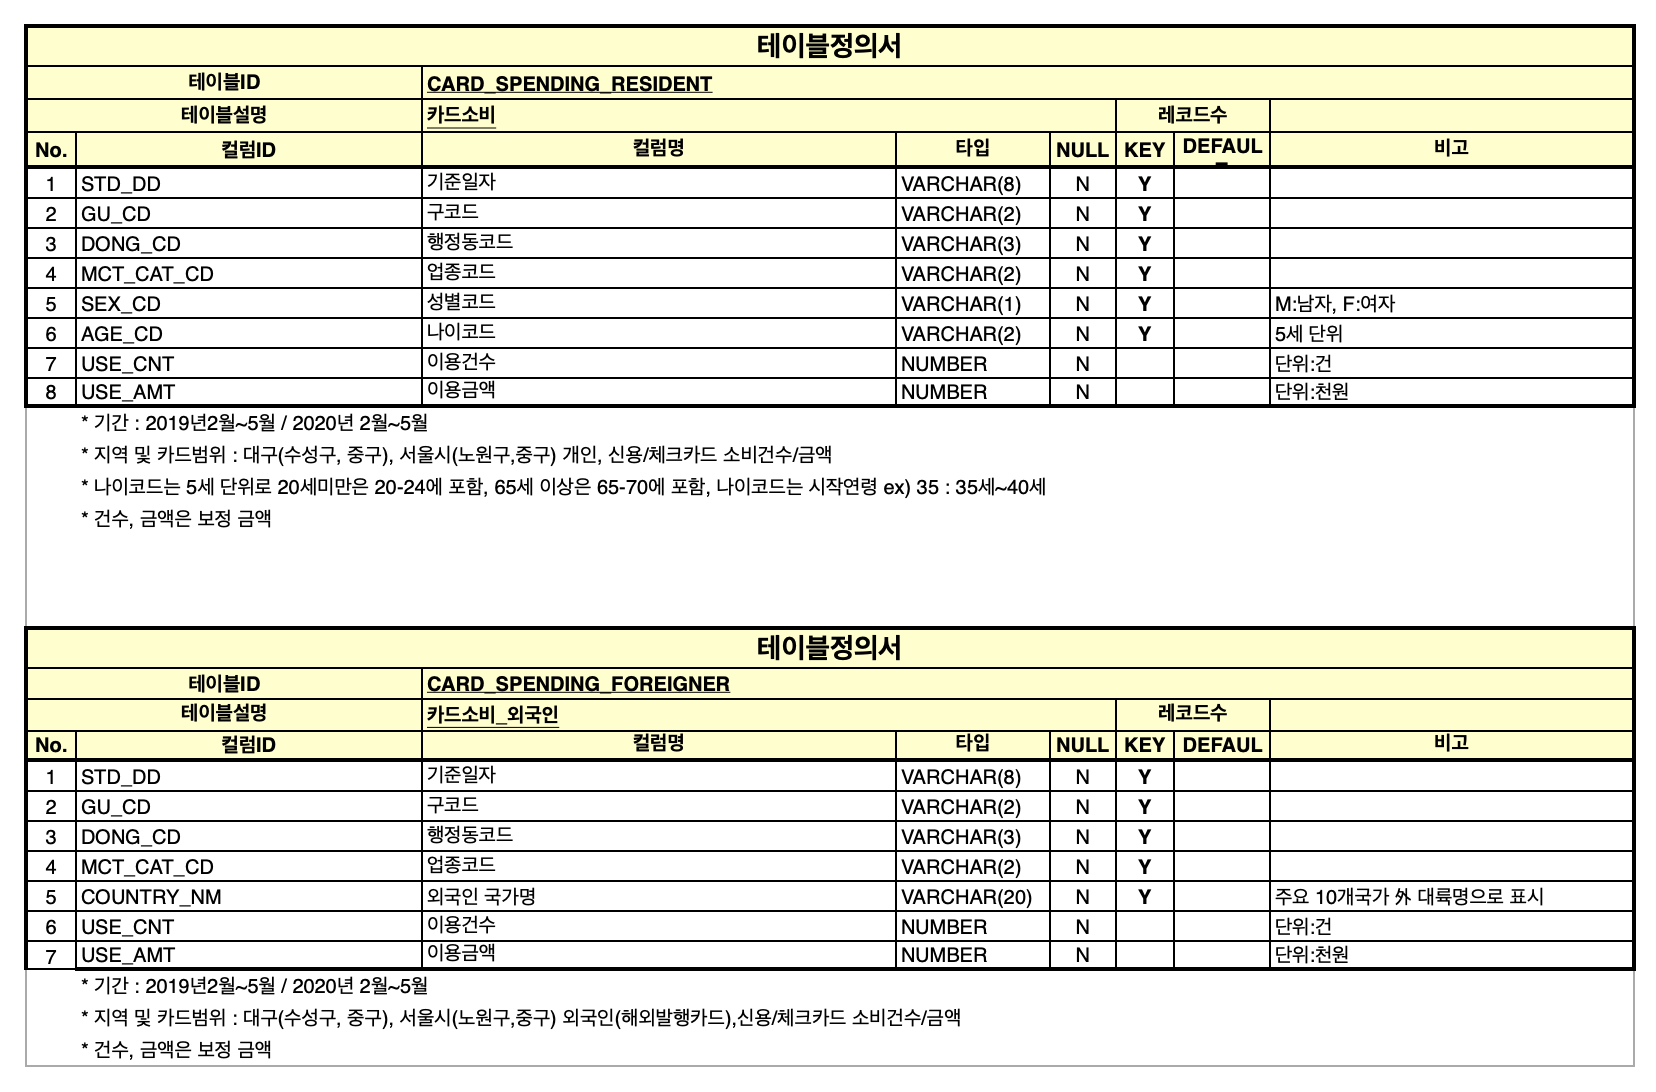



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings

from pylab import rcParams
rcParams['figure.figsize'] = 25, 10

import datetime 

warnings.filterwarnings('ignore')

In [3]:
# 한글폰트 사용을 위한 코드
from matplotlib import rc, font_manager
%matplotlib inline

# 한글폰트 사용을 위한 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
#2019년2월~5월/2020년2월~5월
#대구(수성구,중구), 서울시(노원구, 중구) 개인, 신용/체크카드 소비건수/금액
df_resident=pd.read_csv("/Users/Young/Desktop/bigcon_card/resident_card_spent.txt", sep = "\t")

In [5]:
#date컬럼 추가 
df_resident["date"]=pd.to_datetime(df_resident["STD_DD"], format= '%Y%m%d')
df_resident["date"]

0         2019-02-01
1         2019-02-01
2         2019-02-01
3         2019-02-01
4         2019-02-01
             ...    
2537748   2020-05-31
2537749   2020-05-31
2537750   2020-05-31
2537751   2020-05-31
2537752   2020-05-31
Name: date, Length: 2537753, dtype: datetime64[ns]

In [6]:
#2019와 2020 분리
df_resident_2019=df_resident[df_resident["date"] <= "2019-05-31"]
df_resident_2020=df_resident[df_resident["date"] >= "2020-02-01"] 

In [7]:
#날짜별_이용건수 그루핑
cnt_by_date_19 = df_resident_2019.groupby("date")["USE_CNT"].sum()
cnt_by_date_20 = df_resident_2020.groupby("date")["USE_CNT"].sum()

# 📊 2월~5월 전체 카드 이용건수

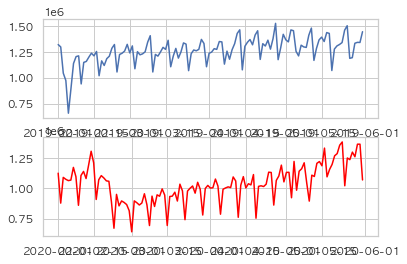

In [8]:
fig, ax = plt.subplots(2,1)

ax[0].plot(cnt_by_date_19) 
ax[1].plot(cnt_by_date_20, color='red')
plt.show()

# 📌2월~5월 전체 카드 매출액


In [9]:
df_resident_2019["+1000"]=df_resident_2019["STD_DD"]+10000
df_resident_2019

df_resident_2019["date_20"]=pd.to_datetime(df_resident_2019["+1000"], format= '%Y%m%d')
df_resident_2019

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,date,+1000,date_20
0,20190201,110,517,10,F,25,11,595,2019-02-01,20200201,2020-02-01
1,20190201,110,517,10,F,50,5,243,2019-02-01,20200201,2020-02-01
2,20190201,110,517,10,F,55,5,27,2019-02-01,20200201,2020-02-01
3,20190201,110,517,10,M,20,11,243,2019-02-01,20200201,2020-02-01
4,20190201,110,517,10,M,25,11,433,2019-02-01,20200201,2020-02-01
...,...,...,...,...,...,...,...,...,...,...,...
1310601,20190531,350,720,81,M,45,9,48,2019-05-31,20200531,2020-05-31
1310602,20190531,350,720,81,M,50,13,72,2019-05-31,20200531,2020-05-31
1310603,20190531,350,720,81,M,60,9,99,2019-05-31,20200531,2020-05-31
1310604,20190531,350,720,81,M,65,9,133,2019-05-31,20200531,2020-05-31


In [10]:
#날짜별_매출액 그루핑
amt_by_date_19 = df_resident_2019.groupby("date_20")[["USE_AMT"]].sum()
amt_by_date_20 = df_resident_2020.groupby("date")[["USE_AMT"]].sum() 

## 📊2019년 vs 2020년 총 매출액 비교

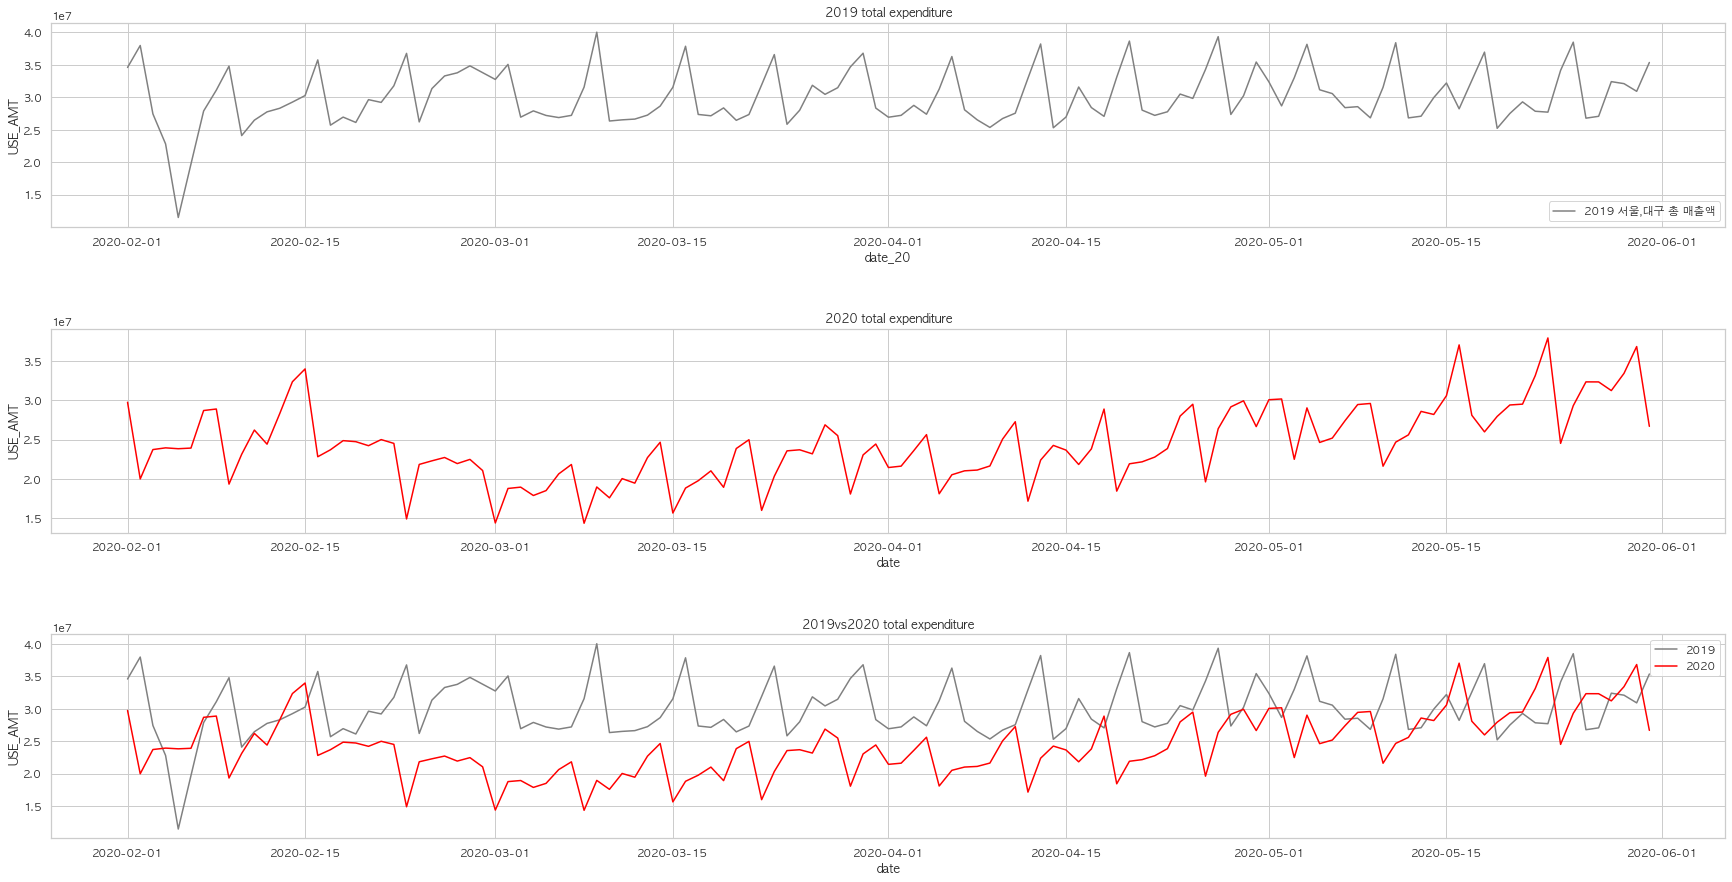

In [11]:
# 2019년,2020년 총 매출액 (내국인)

f, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,15),gridspec_kw={"height_ratios" : [3,3,3], "hspace":0.5})

sns.lineplot(amt_by_date_19.index, amt_by_date_19["USE_AMT"], ax=ax1, color="gray",label="2019 서울,대구 총 매출액")
ax1.set_title("2019 total expenditure")
sns.lineplot(amt_by_date_20.index, amt_by_date_20["USE_AMT"], color='red',ax=ax2)

ax2.set_title("2020 total expenditure")

sns.lineplot(amt_by_date_19.index, amt_by_date_19["USE_AMT"], ax=ax3, color="gray", label="2019") 
sns.lineplot(amt_by_date_20.index, amt_by_date_20["USE_AMT"], color='red',ax=ax3, label="2020")
ax3.set_title("2019vs2020 total expenditure")
ax3.legend()
plt.show()

# 📌2월~5월 서울vs대구 (시도중.. 여기는 건너뛰고 보세요)

In [12]:
#trying 
s_jung_19 = df_resident_2019[df_resident_2019["GU_CD"]==140] #서울중구
s_nowon_19 = df_resident_2019[df_resident_2019["GU_CD"]==350] #서울노원구
s_jung_20 = df_resident_2020[df_resident_2020["GU_CD"]==140] #서울중구
s_nowon_20 = df_resident_2020[df_resident_2020["GU_CD"]==350] #서울노원

In [13]:
df_resident_2019=df_resident[df_resident["date"] <= "2019-05-31"]
df_resident_2020=df_resident[df_resident["date"] >= "2020-02-01"] 

In [14]:
#서울 중구, 노원구 분리
amt_by_gu_19 = df_resident_2019.groupby("GU_CD")[["USE_AMT"]].sum()
amt_by_gu_20 = df_resident_2020.groupby("GU_CD")[["USE_AMT"]].sum()

# 📌2020년 2~5월 서울+대구 업종별 매출액,전년동기대비 증감률 

In [15]:
#업종별 이용건수, 매출액 그루핑
field_by_amt_19 = df_resident_2019.groupby("MCT_CAT_CD")[["USE_AMT"]].sum()
field_by_amt_20 = df_resident_2020.groupby("MCT_CAT_CD")[["USE_AMT"]].sum()

In [16]:
#19년과 20년 분리 후 다시 join 
field_by_amt = field_by_amt_19.merge(field_by_amt_20, on='MCT_CAT_CD', how='left', suffixes=('_19','_20'))
field_by_amt.reset_index(level=['MCT_CAT_CD'], inplace=True)

#업종명 컬럼 추가 
field_by_amt["CD_NAME"]=["숙박","레저","레저업소","문화취미","가구","전기","주방","연료","광학","가전","유통업","의복","직물","신변잡화","서적문구",
                         "사무통신","자동차판매","자동차정비","의료기관","보건위생","요식업","음료식품","수리서비스"]
#증감액, 증감률 컬럼 추가 
field_by_amt["증감액"] = field_by_amt["USE_AMT_20"]-field_by_amt["USE_AMT_19"]
field_by_amt["증감률"] = (field_by_amt["USE_AMT_20"]-field_by_amt["USE_AMT_19"])*100/field_by_amt["USE_AMT_19"]

#증감률로 sort하여 df 출력
print(field_by_amt.sort_values("증감률"))

    MCT_CAT_CD  USE_AMT_19  USE_AMT_20 CD_NAME        증감액        증감률
11          42   107981622    60570614      의복  -47411008 -43.906553
3           22    23425696    14480321    문화취미   -8945375 -38.186165
0           10    63939157    41160612      숙박  -22778545 -35.625345
13          44    29834682    19864594    신변잡화   -9970088 -33.417779
15          52    87365243    61028395    사무통신  -26336848 -30.145682
8           34     8183860     5784333      광학   -2399527 -29.320235
2           21    56179519    40987455    레저업소  -15192064 -27.041997
9           35    33357303    24347172      가전   -9010131 -27.010970
14          50    32779451    23994170    서적문구   -8785281 -26.801184
19          71   112925672    82768637    보건위생  -30157035 -26.705207
7           33   142093443   104781599      연료  -37311844 -26.258667
20          80   922666061   726877815     요식업 -195788246 -21.219838
1           20   102633333    80888934      레저  -21744399 -21.186488
17          62    39511443    3300

# 💎 2019 vs 2020 업종별 인사이트 (2월~5월 토탈) 


## 일반 인사이트

1. 3업종 제외 모든 업종에서 감소 10% 이상씩 매출 감소 
2. 2020년 2월~5월 가장 많이 감소한 업종 Top5  : 의복(43%) 문화취미(38%), 숙박(35%), 신변잡화(33%), 사무통신(30%)
3. 2020년 2월~5월 증가한 업종 Top3 : 가구(16%), 전기(3%), 음료식품(3%) 


> * 가구 : 목재가구, 철재가구
> * 의복 : 남여기성복, 양복, 양품점, 내의류, 아동복, 캐주얼
> * 숙박 : 특급호텔, 1급호텔, 2급호텔, 콘도미니엄, 모텔,여관,기타숙박 
> * 신변잡화 : 제화점, 가방,핸드백(가죽),기성화(신발),시계점,귀금속,금,은,보석,자석요,온돌매트,옥매트,악세사리,성인용품판매점
> * 사무통신 : 사무기기, 정보통신기기, 컴퓨터, 컴퓨터소프트웨어


## 피트니스 인사이트

1. 레저업소 매출액 27% 감소, 레저 21% 감소 : 집합 운동 시설 방문 줄었다. 

> * 레저 업소 : 실내골프장, 테니스장, 볼링장, 스키장, 수영장, 당구장, 노래방, 종합레저타운/놀이동산, 비디오방, 스포츠클럽, 카지노, 유선TV, 전자오락실,PC게임방 
> * 레저 용품 : 음반, 악기, 피아노, 운동경기, 레져용품, 레저스포츠, 자전거 등 




In [17]:
field_by_amt = field_by_amt.astype({'MCT_CAT_CD':'str'})

# 📊 2019, 2020 업종별 매출 누계, 증감률

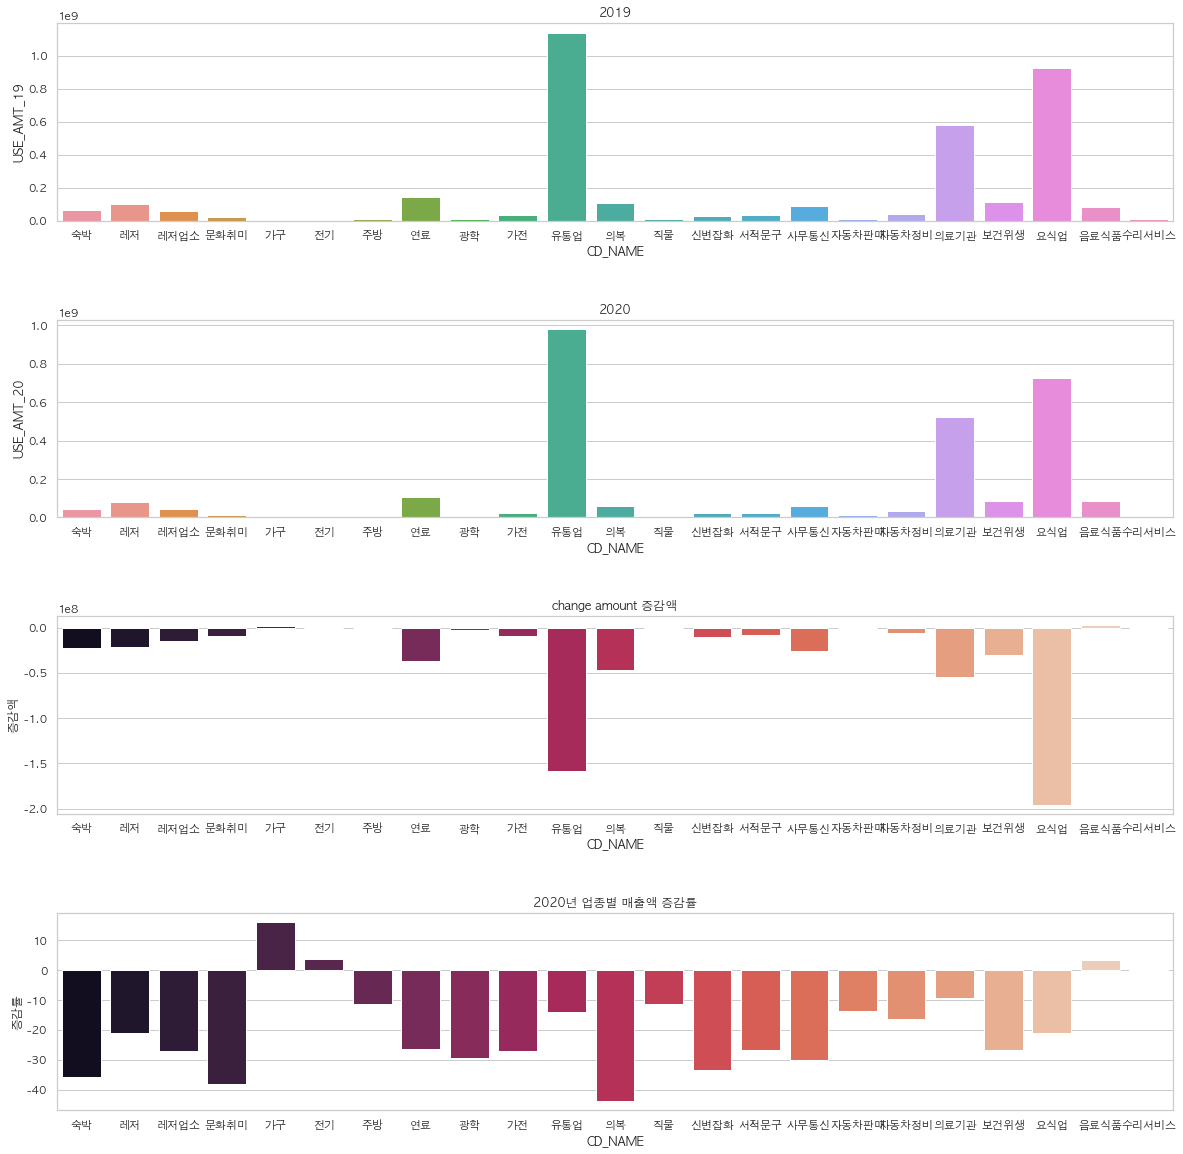

In [18]:
#2019,2020 업종별 total 매출액 그래프 

f, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,20),  gridspec_kw={"height_ratios" : [3,3,3,3], "hspace":0.5})

sns.barplot(field_by_amt["CD_NAME"],field_by_amt["USE_AMT_19"],ax=ax1) #2019
ax1.set_title("2019")

sns.barplot(field_by_amt["CD_NAME"],field_by_amt["USE_AMT_20"],ax=ax2) #2020
ax2.set_title("2020")

sns.barplot(field_by_amt["CD_NAME"],field_by_amt["증감액"],palette="rocket",ax=ax3 )      #증감액
ax3.set_title("change amount 증감액")


sns.barplot(field_by_amt["CD_NAME"], field_by_amt["증감률"],palette="rocket",ax=ax4)  
ax4.set_title("2020년 업종별 매출액 증감률")

plt.show()

# 📌2020년 2월~5월 resident 전체 전년동기대비 업종별 매출 증감률 (Zoom in)

* 💎30,31,81 = 가구,전기,음료식품만 전체 매출액 증가
* 💎42,22,10, 44 = 의복, 문화취미, 숙박, 신변잡화 전체 매출액 가장 큰 폭으로 감소
* 참고) 문화 취미 : 골동품,예술품, 화랑,표구사 , 관광민예,선물용품, 화방, 화원, 수족관, 애완동물, 동물농장, 공연장,극장, 운동경기관람

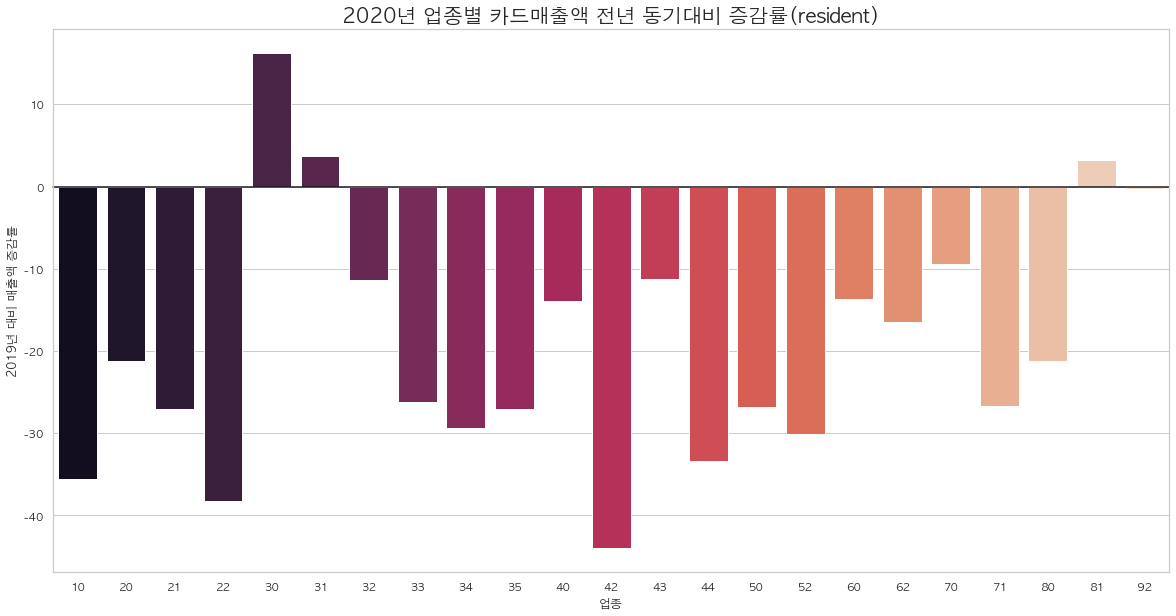

In [19]:
f,ax  = plt.subplots(figsize=(20,10))

sns.barplot(field_by_amt["MCT_CAT_CD"],field_by_amt["증감률"],palette="rocket", ax=ax)
ax.set_xlabel("업종")
ax.set_ylabel("2019년 대비 매출액 증감률")
ax.set_title("2020년 업종별 카드매출액 전년 동기대비 증감률(resident)", fontsize=20)
ax.axhline(0,color="k",clip_on=False) 

plt.show()

# 📌대구 업종별 증감률

In [20]:
#2020년 중 대구 행만 추출 
dg_cd =[110,260] 
rows_dg_cd=df_resident_2020[df_resident_2020["GU_CD"].isin(dg_cd)]

#2020년 대구 인덱싱
dg_ind=rows_dg_cd.set_index(["date"])

#2019중 대구만 추출 
rows_dg_cd_19 = df_resident_2019[df_resident_2019["GU_CD"].isin(dg_cd)]

#2019년 대구 인덱싱 
dg_ind_2019=rows_dg_cd_19.set_index(["date"])


In [21]:
# 2019의 날짜를 2020로 임시로 설정 ( 한 그래프 상에 2019 2020를 놓고 비교하기 위함임 )
dg_ind_2019["date+10000"]=dg_ind_2019["STD_DD"]+10000
dg_ind_2019["date_19to20"]=pd.to_datetime(dg_ind_2019["date+10000"], format= '%Y%m%d')
dg_ind_2019.set_index("date_19to20")

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,date+10000
date_19to20,,,,,,,,,
2020-02-01,20190201,110,517,10,F,25,11,595,20200201
2020-02-01,20190201,110,517,10,F,50,5,243,20200201
2020-02-01,20190201,110,517,10,F,55,5,27,20200201
2020-02-01,20190201,110,517,10,M,20,11,243,20200201
2020-02-01,20190201,110,517,10,M,25,11,433,20200201
...,...,...,...,...,...,...,...,...,...
2020-05-31,20190531,260,690,92,F,40,6,53,20200531
2020-05-31,20190531,260,690,92,F,45,17,259,20200531
2020-05-31,20190531,260,690,92,M,30,6,28,20200531


In [22]:
#대구 2019, 2020년 업종별 매출액 합계, 증감률 계산 

dg_2019_by_field = dg_ind_2019.groupby("MCT_CAT_CD")["USE_AMT"].sum()
dg_2020_by_field = dg_ind.groupby("MCT_CAT_CD")["USE_AMT"].sum()
dg_by_field = pd.merge(dg_2019_by_field, dg_2020_by_field, left_index=True, right_index=True, suffixes=("_19","_20"))
dg_by_field["증감률"]=(dg_by_field["USE_AMT_20"]-dg_by_field["USE_AMT_19"])*100/dg_by_field["USE_AMT_19"]
dg_by_field["CD_NAME"]=["숙박","레저","레저업소","문화취미","가구","전기","주방","연료","광학","가전","유통업","의복","직물","신변잡화","서적문구",
                         "사무통신","자동차판매","자동차정비","의료기관","보건위생","요식업","음료식품","수리서비스"]

In [23]:
#증감률 큰 순서대로
print(dg_by_field.sort_values("증감률"))

            USE_AMT_19  USE_AMT_20        증감률 CD_NAME
MCT_CAT_CD                                           
22            13926203     7076384 -49.186551    문화취미
42            46529942    26010126 -44.100240      의복
10            11640055     6725827 -42.218254      숙박
34             2476498     1464022 -40.883376      광학
21            18896808    11246412 -40.485123    레저업소
52            54574721    33447312 -38.712812    사무통신
44            13489326     8335742 -38.204904    신변잡화
80           259648014   164051659 -36.817672     요식업
20            20949945    13904652 -33.629172      레저
35             7182052     4779900 -33.446597      가전
50             9706035     6541083 -32.608084    서적문구
71            35861108    24420818 -31.901663    보건위생
33            89953023    63741889 -29.138692      연료
32             1661122     1186774 -28.555880      주방
60             9595983     7314449 -23.775928   자동차판매
43             3207993     2562832 -20.111048      직물
40           280476382   232

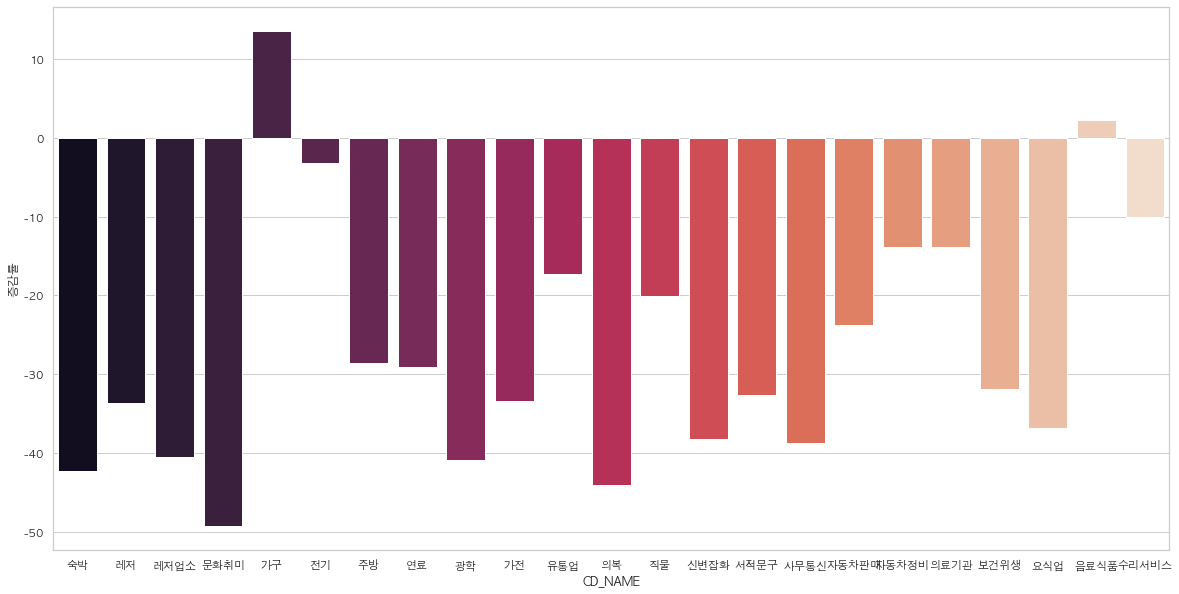

In [24]:
f, ax=plt.subplots(figsize=(20,10))
sns.barplot(dg_by_field["CD_NAME"], dg_by_field["증감률"],palette="rocket")
plt.show() 

#### 💎대구에서 가장 많은 매출 감소 발생한 업종 Top5 : 문화취미, 숙박, 의복, 광학, 레저업소
>* 문화취미 : 골동품, 예술품, 화랑, 표구사, 화방, 화원, 수족관, 애완동물, 동물농장, 공연장,극장, 운동경기관람 등 
>* 광학 : 사진기, 광학제품, 사진관,DPNE 
#### 💎대구에서 매출 증가한 업종은 단 2가지 : 가구, 음료식품
#### 💎대구에서 비교적 감소폭 적은 업종 : 전기, 수리서비스, 자동차정비, 의료기관, 유통업

# 📌'19 vs '20 대구 업종별 상세

In [25]:
#업종코드 분류

is_10= dg_ind["MCT_CAT_CD"]==10 #숙박

is_20= dg_ind["MCT_CAT_CD"]==20 #레저용품 
is_21= dg_ind["MCT_CAT_CD"]==21 #레저업소 
is_22= dg_ind["MCT_CAT_CD"]==22 #문화취미

is_30= dg_ind["MCT_CAT_CD"]==30 #가구
is_31= dg_ind["MCT_CAT_CD"]==31 #전기
is_32= dg_ind["MCT_CAT_CD"]==32 #주방
is_33= dg_ind["MCT_CAT_CD"]==33 #연료 
is_34= dg_ind["MCT_CAT_CD"]==34 #광학
is_35= dg_ind["MCT_CAT_CD"]==35 #가전

is_40= dg_ind["MCT_CAT_CD"]==40 #유통
is_42= dg_ind["MCT_CAT_CD"]==42 #의복
is_43= dg_ind["MCT_CAT_CD"]==43 #직물
is_44= dg_ind["MCT_CAT_CD"]==44 #신변잡화

is_50= dg_ind["MCT_CAT_CD"]==50 #서적문구 
is_52= dg_ind["MCT_CAT_CD"]==52 #사무통신

is_60= dg_ind["MCT_CAT_CD"]==60 #자동차판매
is_62= dg_ind["MCT_CAT_CD"]==62 #자동차정비

is_70= dg_ind["MCT_CAT_CD"]==70 #의료기관
is_71= dg_ind["MCT_CAT_CD"]==70 #보건위생

is_80= dg_ind["MCT_CAT_CD"]==80 #요식업
is_81= dg_ind["MCT_CAT_CD"]==81 #음료식품

is_92= dg_ind["MCT_CAT_CD"]==92 #수리서비스


#2020년 날짜별-업종매출액 

dg_ind_10 = dg_ind[is_10].groupby("date")[["USE_AMT"]].sum() #숙박

dg_ind_20 = dg_ind[is_20].groupby("date")[["USE_AMT"]].sum() #레저용품
dg_ind_21 = dg_ind[is_21].groupby("date")[["USE_AMT"]].sum() #레저업소
dg_ind_22 = dg_ind[is_22].groupby("date")[["USE_AMT"]].sum() #문화취미

dg_ind_30 = dg_ind[is_30].groupby("date")[["USE_AMT"]].sum() #가구 
dg_ind_31 = dg_ind[is_31].groupby("date")[["USE_AMT"]].sum() #전기
dg_ind_32 = dg_ind[is_32].groupby("date")[["USE_AMT"]].sum() #주방
dg_ind_33 = dg_ind[is_33].groupby("date")[["USE_AMT"]].sum() #연료
dg_ind_34 = dg_ind[is_34].groupby("date")[["USE_AMT"]].sum() #광학
dg_ind_35 = dg_ind[is_35].groupby("date")[["USE_AMT"]].sum() #가전

dg_ind_40 = dg_ind[is_40].groupby("date")[["USE_AMT"]].sum() #유통
dg_ind_42 = dg_ind[is_42].groupby("date")[["USE_AMT"]].sum() #패션
dg_ind_43 = dg_ind[is_43].groupby("date")[["USE_AMT"]].sum() #직물
dg_ind_44 = dg_ind[is_44].groupby("date")[["USE_AMT"]].sum() #신변잡화

dg_ind_50 = dg_ind[is_50].groupby("date")[["USE_AMT"]].sum() #서적문구
dg_ind_52 = dg_ind[is_52].groupby("date")[["USE_AMT"]].sum() #사무통신

dg_ind_60 = dg_ind[is_60].groupby("date")[["USE_AMT"]].sum() #자동차판매
dg_ind_62 = dg_ind[is_62].groupby("date")[["USE_AMT"]].sum() #자동차정비

dg_ind_70  = dg_ind[is_70].groupby("date")[["USE_AMT"]].sum() #의료기관 
dg_ind_71  = dg_ind[is_71].groupby("date")[["USE_AMT"]].sum() #보건위생

dg_ind_80  = dg_ind[is_80].groupby("date")[["USE_AMT"]].sum() #요식업
dg_ind_81  = dg_ind[is_81].groupby("date")[["USE_AMT"]].sum() #음료식품

dg_ind_92  = dg_ind[is_92].groupby("date")[["USE_AMT"]].sum() #수리서비스


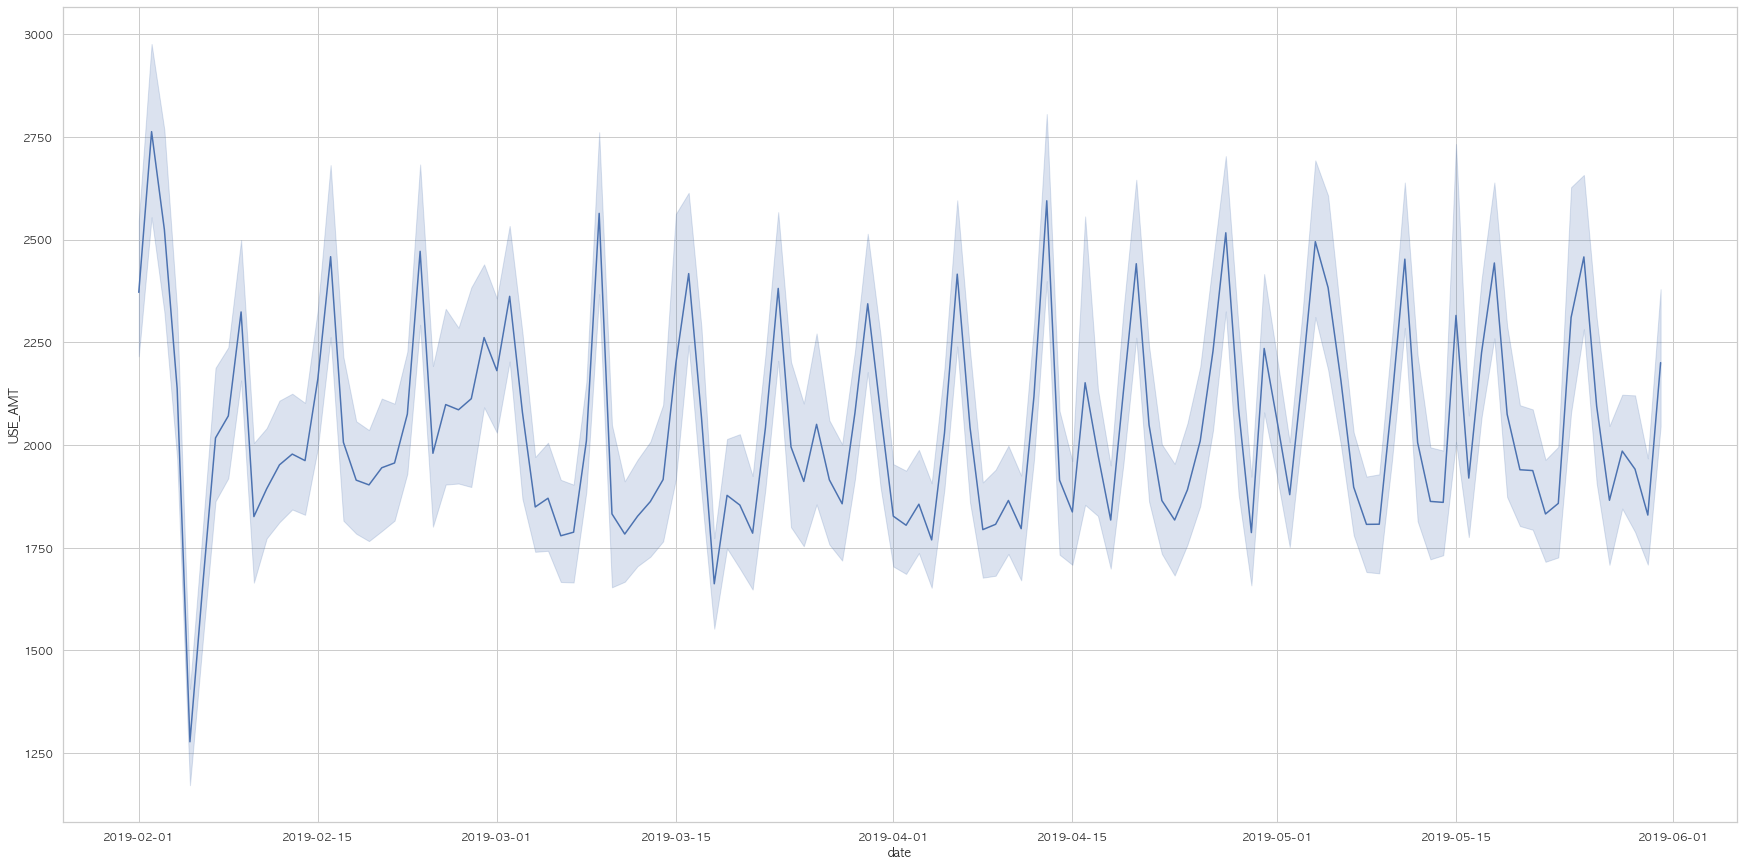

In [26]:
#2019 시각화테스트 

f,ax = plt.subplots(figsize=(30,15))

sns.lineplot(x=dg_ind_2019.index, y=dg_ind_2019["USE_AMT"], data=dg_ind_2019,ax=ax)
plt.show() 

In [27]:
#2019년 업종별 분리

is_10_19 = dg_ind_2019["MCT_CAT_CD"]==10 #숙박

is_20_19 = dg_ind_2019["MCT_CAT_CD"]==20 #레저용품 
is_21_19 = dg_ind_2019["MCT_CAT_CD"]==21 #레저업소 
is_22_19 = dg_ind_2019["MCT_CAT_CD"]==22 #문화취미

is_30_19 = dg_ind_2019["MCT_CAT_CD"]==30 #가구
is_31_19 = dg_ind_2019["MCT_CAT_CD"]==31 #전기
is_32_19 = dg_ind_2019["MCT_CAT_CD"]==32 #주방
is_33_19 = dg_ind_2019["MCT_CAT_CD"]==33 #연료 
is_34_19 = dg_ind_2019["MCT_CAT_CD"]==34 #광학
is_35_19 = dg_ind_2019["MCT_CAT_CD"]==35 #가전

is_40_19 = dg_ind_2019["MCT_CAT_CD"]==40 #유통
is_42_19 = dg_ind_2019["MCT_CAT_CD"]==42 #의복
is_43_19 = dg_ind_2019["MCT_CAT_CD"]==43 #직물
is_44_19 = dg_ind_2019["MCT_CAT_CD"]==44 #신변잡화

is_50_19 = dg_ind_2019["MCT_CAT_CD"]==50 #서적문구 
is_52_19 = dg_ind_2019["MCT_CAT_CD"]==52 #사무통신

is_60_19 = dg_ind_2019["MCT_CAT_CD"]==60 #자동차판매
is_62_19 = dg_ind_2019["MCT_CAT_CD"]==62 #자동차정비

is_70_19 = dg_ind_2019["MCT_CAT_CD"]==70 #의료기관
is_71_19 = dg_ind_2019["MCT_CAT_CD"]==70 #보건위생

is_80_19 = dg_ind_2019["MCT_CAT_CD"]==80 #요식업
is_81_19 = dg_ind_2019["MCT_CAT_CD"]==81 #음료식품

is_92_19 = dg_ind_2019["MCT_CAT_CD"]==92 #수리서비스


#2019년 날짜별-업종매출액 

dg_2019_10 = dg_ind_2019[is_10_19].groupby("date_19to20")[["USE_AMT"]].sum() #숙박

dg_2019_20 = dg_ind_2019[is_20_19].groupby("date_19to20")[["USE_AMT"]].sum() #레저용품
dg_2019_21 = dg_ind_2019[is_21_19].groupby("date_19to20")[["USE_AMT"]].sum() #레저업소
dg_2019_22 = dg_ind_2019[is_22_19].groupby("date_19to20")[["USE_AMT"]].sum() #문화취미

dg_2019_30 = dg_ind_2019[is_30_19].groupby("date_19to20")[["USE_AMT"]].sum() #가구 
dg_2019_31 = dg_ind_2019[is_31_19].groupby("date_19to20")[["USE_AMT"]].sum() #전기
dg_2019_32 = dg_ind_2019[is_32_19].groupby("date_19to20")[["USE_AMT"]].sum() #주방
dg_2019_33 = dg_ind_2019[is_33_19].groupby("date_19to20")[["USE_AMT"]].sum() #연료
dg_2019_34 = dg_ind_2019[is_34_19].groupby("date_19to20")[["USE_AMT"]].sum() #광학
dg_2019_35 = dg_ind_2019[is_35_19].groupby("date_19to20")[["USE_AMT"]].sum() #가전

dg_2019_40 = dg_ind_2019[is_40_19].groupby("date_19to20")[["USE_AMT"]].sum() #유통
dg_2019_42 = dg_ind_2019[is_42_19].groupby("date_19to20")[["USE_AMT"]].sum() #패션
dg_2019_43 = dg_ind_2019[is_43_19].groupby("date_19to20")[["USE_AMT"]].sum() #직물
dg_2019_44 = dg_ind_2019[is_44_19].groupby("date_19to20")[["USE_AMT"]].sum() #신변잡화

dg_2019_50 = dg_ind_2019[is_50_19].groupby("date_19to20")[["USE_AMT"]].sum() #서적문구
dg_2019_52 = dg_ind_2019[is_52_19].groupby("date_19to20")[["USE_AMT"]].sum() #사무통신

dg_2019_60 = dg_ind_2019[is_60_19].groupby("date_19to20")[["USE_AMT"]].sum() #자동차판매
dg_2019_62 = dg_ind_2019[is_62_19].groupby("date_19to20")[["USE_AMT"]].sum() #자동차정비

dg_2019_70  = dg_ind_2019[is_70_19].groupby("date_19to20")[["USE_AMT"]].sum() #의료기관 
dg_2019_71  = dg_ind_2019[is_71_19].groupby("date_19to20")[["USE_AMT"]].sum() #보건위생

dg_2019_80  = dg_ind_2019[is_80_19].groupby("date_19to20")[["USE_AMT"]].sum() #요식업
dg_2019_81  = dg_ind_2019[is_81_19].groupby("date_19to20")[["USE_AMT"]].sum() #음료식품

dg_2019_92  = dg_ind_2019[is_92_19].groupby("date_19to20")[["USE_AMT"]].sum() #수리서비스

In [28]:
##############please ignore : 함수 Test, 이후 수정 예정 ###################

#x = [10,20,21,22,30,31,32,33,34,35,40,42,43,44,50,52,60,62,70,71,80,81,92]


#def test(x):
    #return dg_ind[dg_ind["MCT_CAT_CD"]==x].groupby("date")[["USE_AMT"]].sum()

#for elem in x:
    #print(test(elem)) 

In [29]:
#dg_test = dg_ind.groupby(["date"])[["test"]].mean()
#dg_test

#f, ax = plt.subplots()
#sns.lineplot(data=dg_ind["date"], ax=ax, hue="MCT_CAT_CD")
#plt.show()

In [30]:
#함수연습
#함수명을 쓰지 않는 방향 --> 성능 차이도 O
#그래서 lambda = random guy _ faster one 

#def test(a):
    #return a+2

#dg_ind_20["+2"]=dg_ind_20["USE_AMT"].apply(test) 

#(lambda input : output) python_st_code 

#lambda 연습 
#dg_ind_20["+2"]=dg_ind_20["USE_AMT"].apply(lambda x : x+2)
#dg_ind_20

# 📌대구 업종별 매출 추이를 알아보자


> * 2020년 전체 업종 매출액 추이

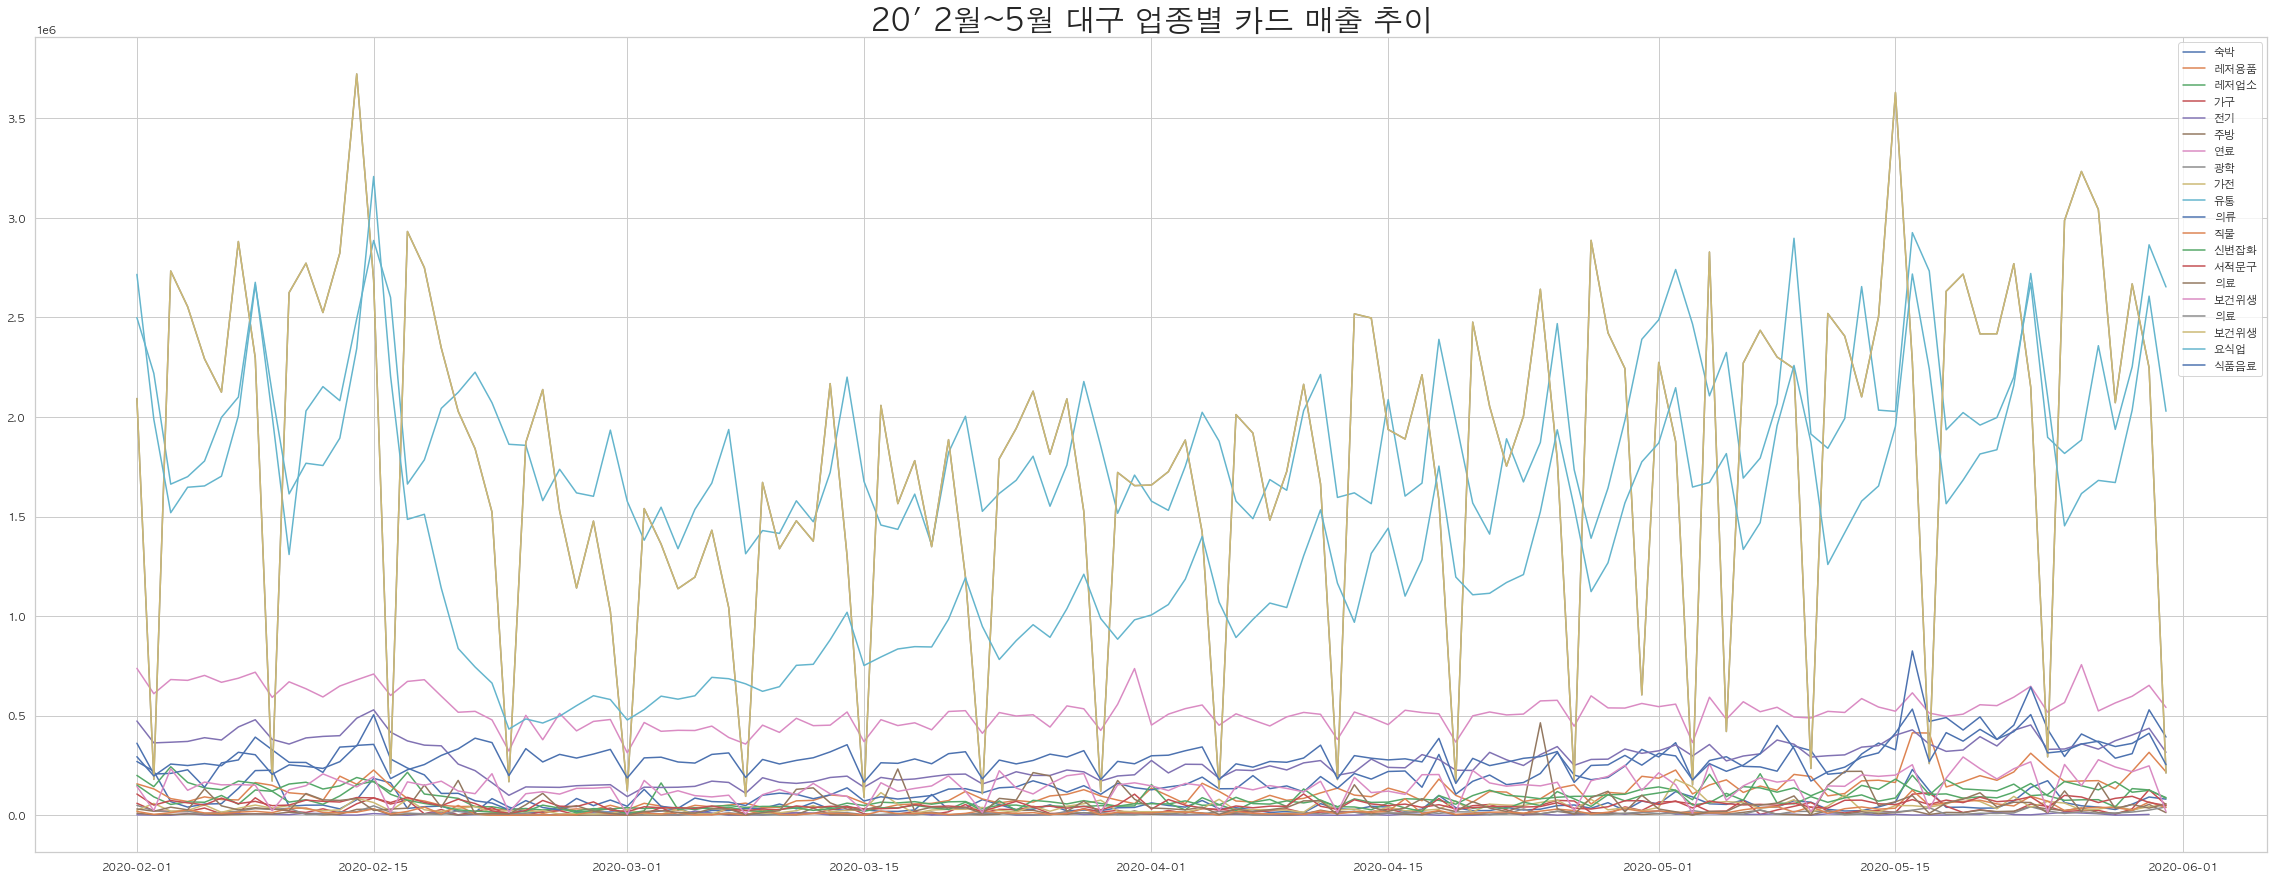

In [31]:
#전체 업종 

f,ax =plt.subplots(figsize=(40,15)) 

sns.lineplot(data=dg_ind_10["USE_AMT"],ax=ax, label="숙박")

sns.lineplot(data=dg_ind_20["USE_AMT"],ax=ax, label="레저용품")
sns.lineplot(data=dg_ind_21["USE_AMT"],ax=ax, label="레저업소") 

sns.lineplot(data=dg_ind_30["USE_AMT"],ax=ax, label="가구")
sns.lineplot(data=dg_ind_31["USE_AMT"],ax=ax, label="전기")
sns.lineplot(data=dg_ind_32["USE_AMT"],ax=ax, label="주방")
sns.lineplot(data=dg_ind_33["USE_AMT"],ax=ax, label="연료")
sns.lineplot(data=dg_ind_34["USE_AMT"],ax=ax, label="광학")

sns.lineplot(data=dg_ind_35["USE_AMT"],ax=ax, label="가전")

sns.lineplot(data=dg_ind_40["USE_AMT"],ax=ax, label="유통")
sns.lineplot(data=dg_ind_42["USE_AMT"],ax=ax, label="의류") 
sns.lineplot(data=dg_ind_43["USE_AMT"],ax=ax, label="직물")
sns.lineplot(data=dg_ind_44["USE_AMT"],ax=ax, label="신변잡화")  

sns.lineplot(data=dg_ind_50["USE_AMT"],ax=ax, label="서적문구") 
sns.lineplot(data=dg_ind_52["USE_AMT"],ax=ax) 

sns.lineplot(data=dg_ind_60["USE_AMT"],ax=ax, label="의료")  
sns.lineplot(data=dg_ind_62["USE_AMT"],ax=ax, label="보건위생") 

sns.lineplot(data=dg_ind_70["USE_AMT"],ax=ax, label="의료")  
sns.lineplot(data=dg_ind_71["USE_AMT"],ax=ax, label="보건위생") 

sns.lineplot(data=dg_ind_80["USE_AMT"],ax=ax, label="요식업")
sns.lineplot(data=dg_ind_81["USE_AMT"],ax=ax, label="식품음료")  
             
ax.set_title("20' 2월~5월 대구 업종별 카드 매출 추이", fontsize=30)
plt.show() 

# 📌Zoom In : 대구 19'vs20' #Home 매출액 비교

* 2019vs2020 매출액 비교 : #HOME (가전,가구,주방) 
>* 💎 20' 가구 매출 4월 이후로 전년동기대비 증가
>* ✅ 가전 : 가전, 가전용품
>* ✅ 가구 : 목재가구, 철재가구 
>* ✅ 주방 : 주방기구 및 용품, 정수기  

No handles with labels found to put in legend.


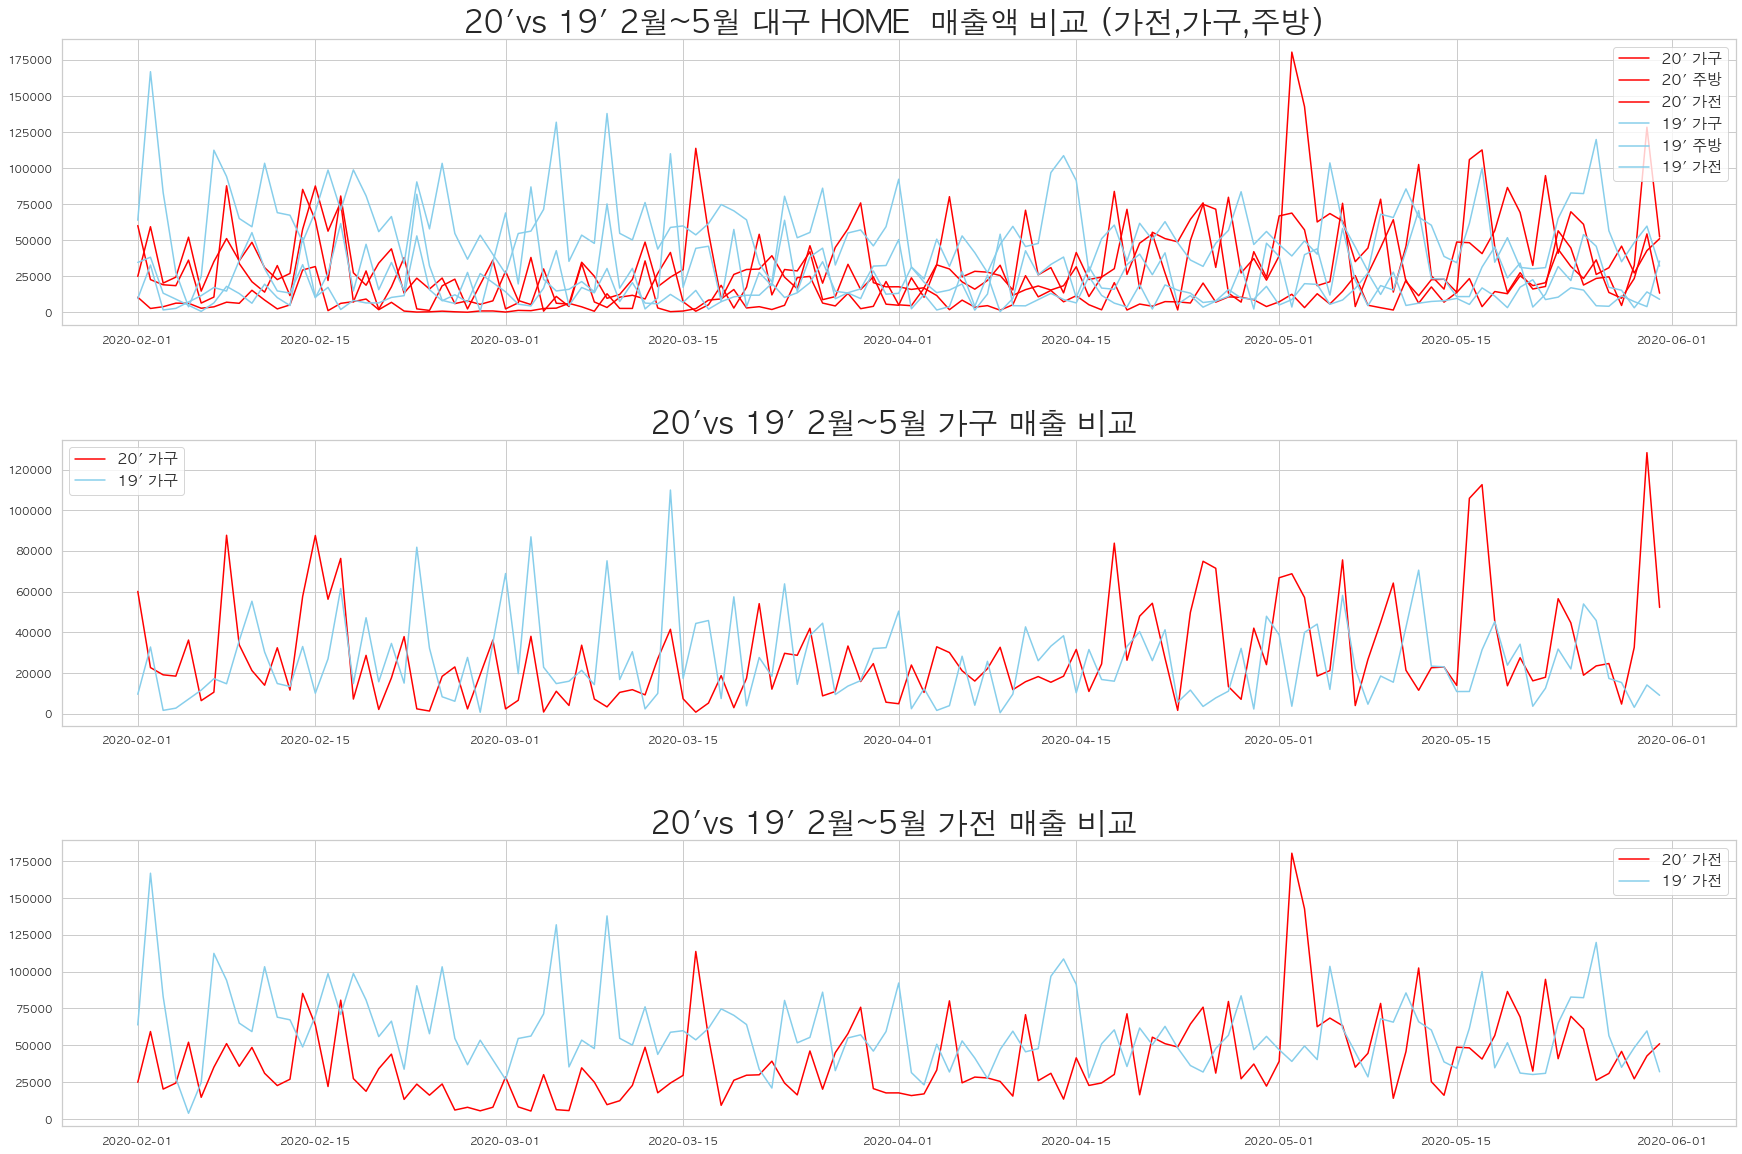

In [32]:
#업종별 묶음 
#전체 업종 

f,(ax,ax2,ax3) =plt.subplots(3,1,figsize=(30,20),gridspec_kw={"height_ratios" : [1,1,1], "hspace":0.4}) 

#'20 vs '19 대구 home;가전,가구,주방 매출추이 
#2020
sns.lineplot(data=dg_ind_30["USE_AMT"],ax=ax, label="20' 가구", color="red")
sns.lineplot(data=dg_ind_32["USE_AMT"],ax=ax, label="20' 주방", color="red")
sns.lineplot(data=dg_ind_35["USE_AMT"],ax=ax, label="20' 가전", color="red")
#2019 
sns.lineplot(data=dg_2019_30["USE_AMT"],ax=ax, label="19' 가구", color="skyblue")
sns.lineplot(data=dg_2019_32["USE_AMT"],ax=ax, label="19' 주방", color="skyblue")
sns.lineplot(data=dg_2019_35["USE_AMT"],ax=ax, label="19' 가전", color="skyblue")
ax.set_title("20'vs 19' 2월~5월 대구 HOME  매출액 비교 (가전,가구,주방) ", fontsize=30)

#가구only 
sns.lineplot(data=dg_ind_30["USE_AMT"],ax=ax2, label="20' 가구", color="red")
sns.lineplot(data=dg_2019_30["USE_AMT"],ax=ax2, label="19' 가구", color="skyblue")
ax2.set_title("20'vs 19' 2월~5월 가구 매출 비교 ", fontsize=30)

#가전 only 
sns.lineplot(data=dg_ind_35["USE_AMT"],ax=ax3, label="20' 가전", color="red")
sns.lineplot(data=dg_2019_35["USE_AMT"],ax=ax3, label="19' 가전", color="skyblue")
ax3.set_title("20'vs 19' 2월~5월 가전 매출 비교 ", fontsize=30)

#legend
ax.legend(fontsize=15)
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
ax3.legend(fontsize=15)

plt.show()

# 📌 대구 zoom in : '19 vs ' 20 #레저

* 2019vs2020 매출액 비교 : #레져 (레저업소,레저용품) 
>* 💎 레저 업소 : 2020년 2월 15부터 급락, 5월 이후 회복 시작
>* 💎 레저 용품 : 2020년 5월 15일 이후 레저  2019년 동기 매출액보다 증가.
>* ✅ 참고 : 레저 용품에는 스포츠 용품 외의 음악 관련 제품도 포함됨.  음반 테이프, 악기, 피아노 대리점, 운동경기, 레져용품, 레저스포츠, 자전거

* 2019vs2020 매출액 비교 : #이동 관련 (연료, 자동차판매,자동차수리) 
>* 💎 2020년 코로나19 여파로 연료 매출액 감소 

In [33]:
#대구 레저업소 증감률 도출 
dg_21=pd.merge(dg_ind_21, dg_2019_21, left_index=True, right_index=True, suffixes=("_20","_19"))
dg_21["증감률"] = (dg_21["USE_AMT_20"] - dg_21["USE_AMT_19"])*100 / dg_21["USE_AMT_19"] 
dg_21

,USE_AMT_20,USE_AMT_19,증감률
2020-02-01,199982,188687,5.986104
2020-02-02,143713,166397,-13.632457
2020-02-03,243674,145599,67.359666
2020-02-04,164799,133207,23.716471
2020-02-05,137412,67527,103.491937
...,...,...,...
2020-05-27,127486,125102,1.905645
2020-05-28,168451,156414,7.695603
2020-05-29,115629,147108,-21.398564
2020-05-30,125053,133750,-6.502430


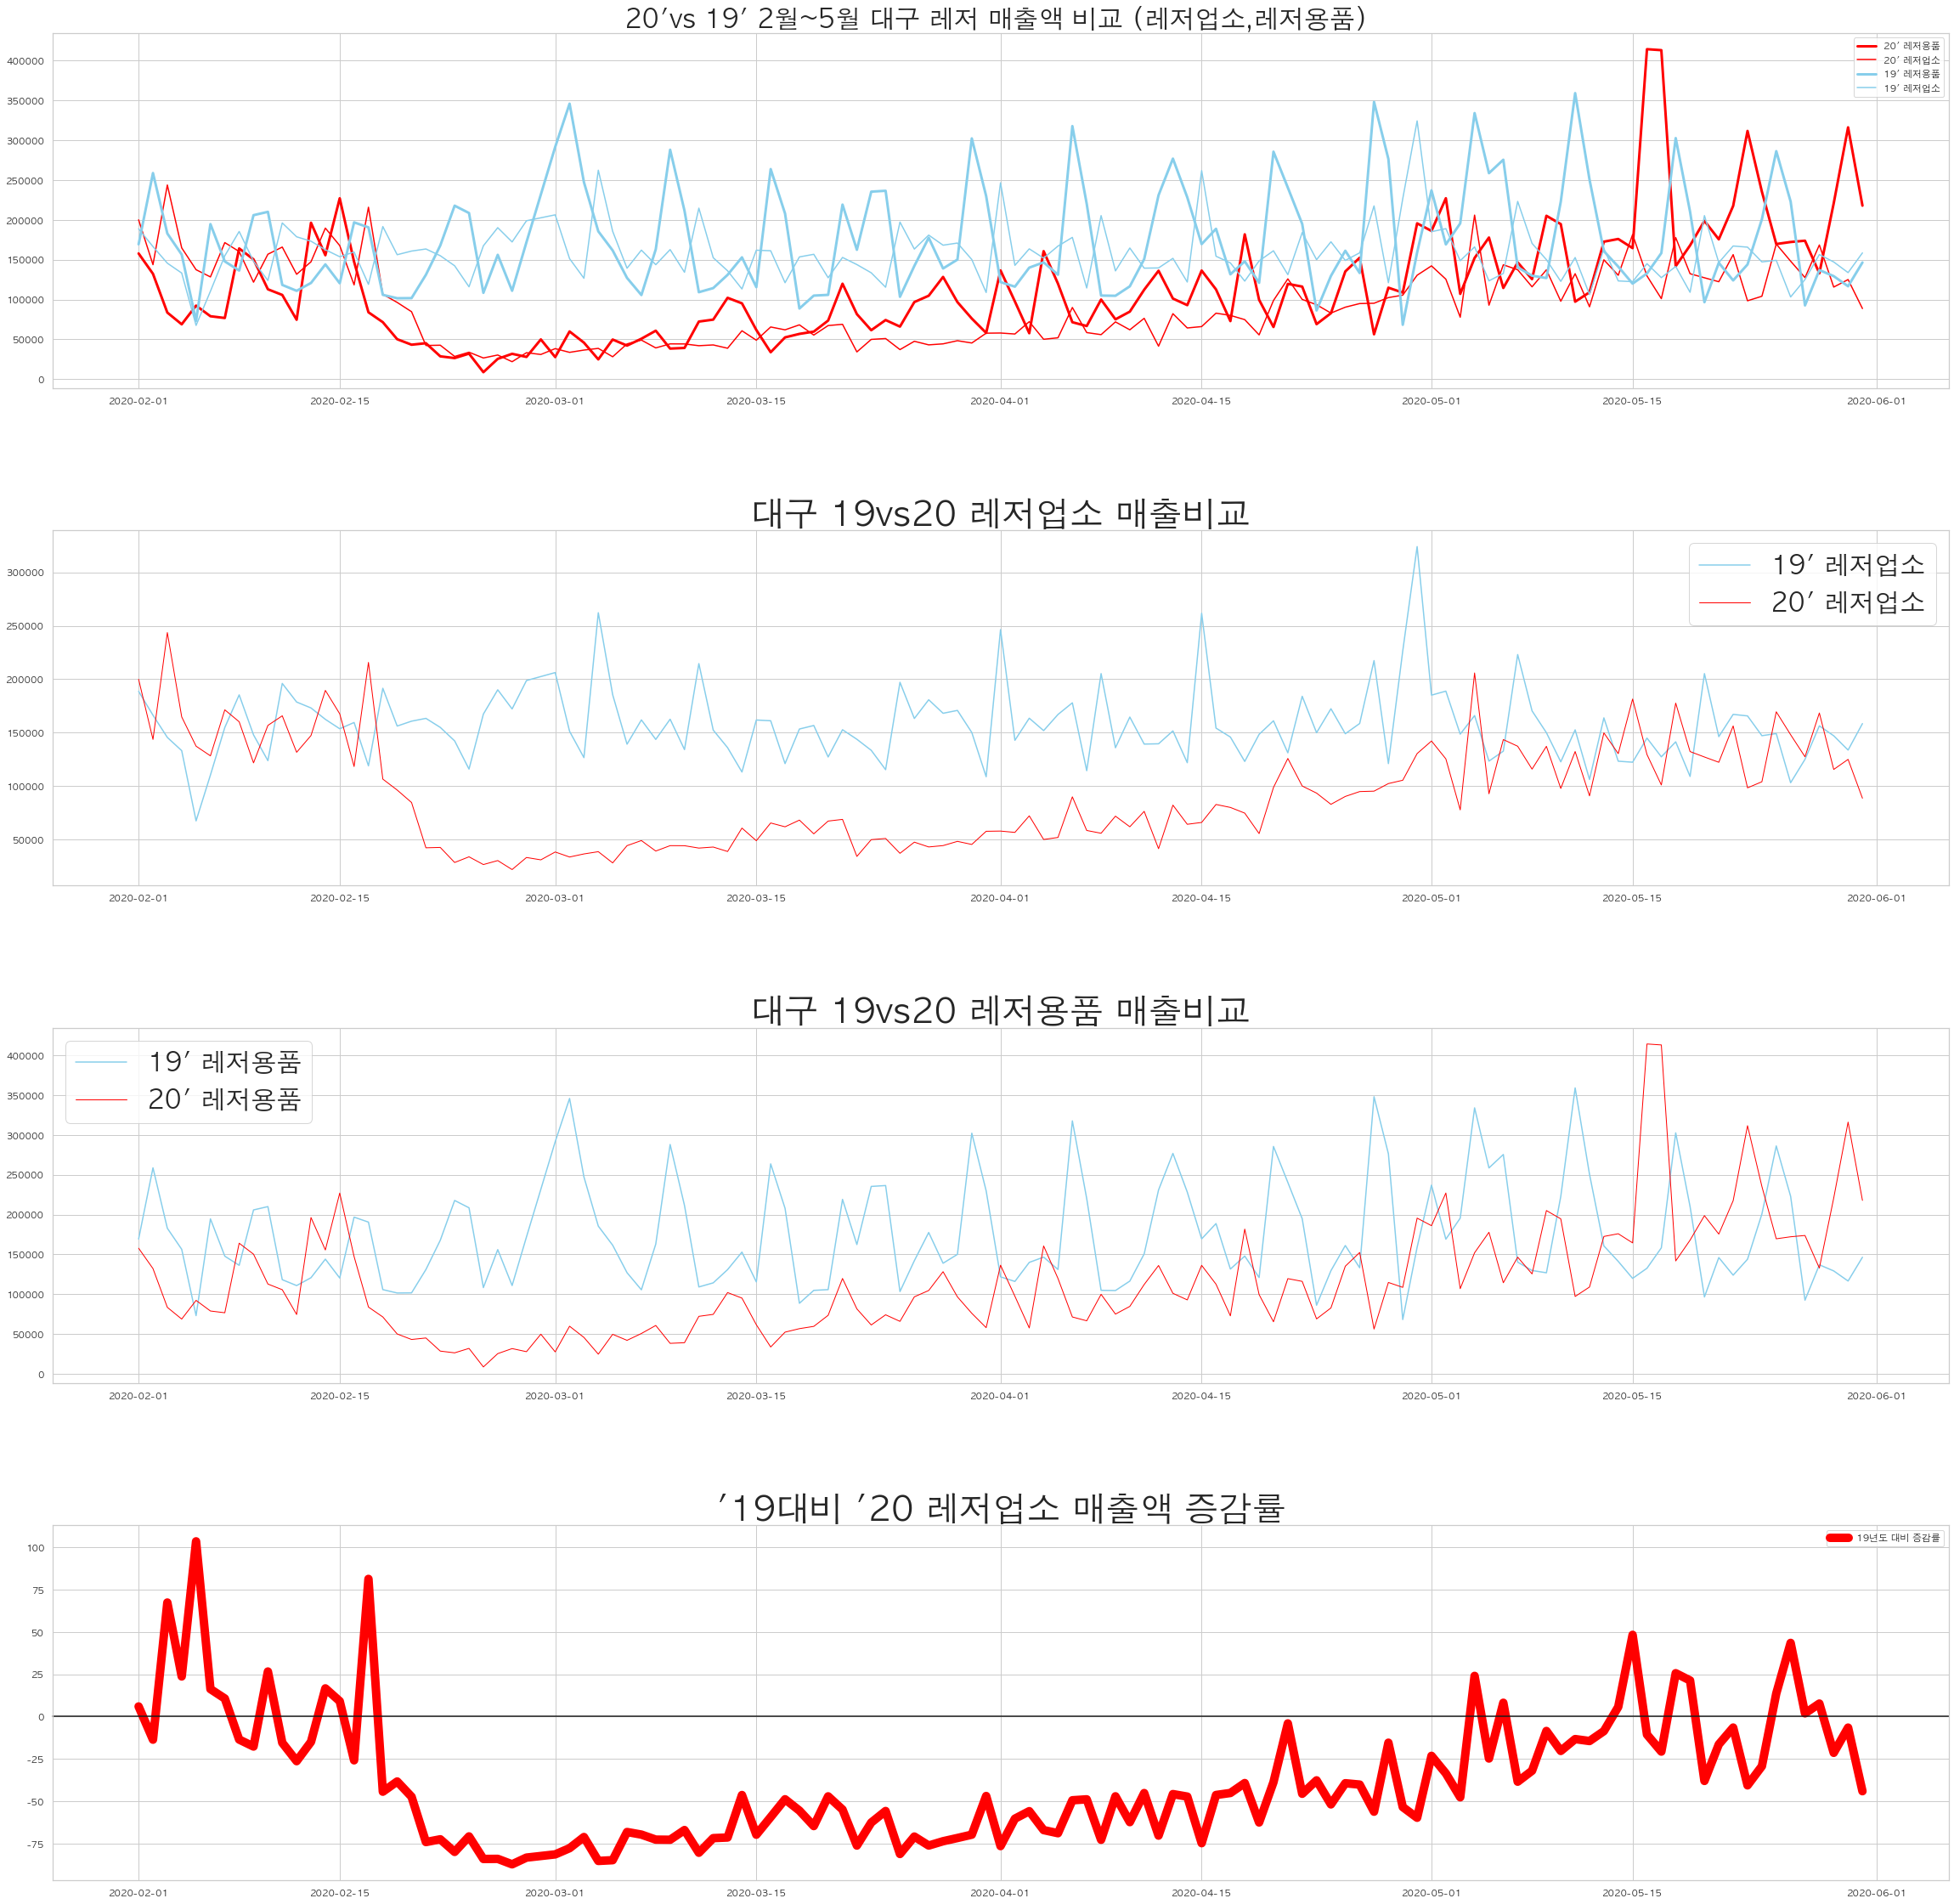

In [34]:
#2020년 2월~5월 대구 레저업소, 레저용품 지출

f,(ax0, ax1,ax2,ax3)=plt.subplots(4,1,figsize=(40,40),gridspec_kw={"height_ratios" : [1,1,1,1], "hspace":0.4}) 

#'20 vs '19 대구 레저:레저업소,레저용품 매출추이
#2020
sns.lineplot(data=dg_ind_20["USE_AMT"],ax=ax0, label="20' 레저용품", color="red",linewidth=3)
sns.lineplot(data=dg_ind_21["USE_AMT"],ax=ax0, label="20' 레저업소", color="red") 
#2019
sns.lineplot(data=dg_2019_20["USE_AMT"],ax=ax0, label="19' 레저용품",color="skyblue",linewidth=3)
sns.lineplot(data=dg_2019_21["USE_AMT"],ax=ax0, label="19' 레저업소",color="skyblue") 
ax0.set_title("20'vs 19' 2월~5월 대구 레저 매출액 비교 (레저업소,레저용품) ", fontsize=30)

#레저업소
#sns.lineplot(data=dg_ind_20_19["USE_AMT"],ax=ax1, color="black")
sns.lineplot(data=dg_2019_21["USE_AMT"],ax=ax1, color="skyblue", label="19' 레저업소")
ax1.set_title("대구 19vs20 레저업소 매출비교", fontsize=40)
#2020 
sns.lineplot(data=dg_ind_21["USE_AMT"],ax=ax1, color="red",label="20' 레저업소",linewidth=1)

#레저용품 #2019
sns.lineplot(data=dg_2019_20["USE_AMT"],ax=ax2, color="skyblue",label="19' 레저용품")
#2020
sns.lineplot(data=dg_ind_20["USE_AMT"],ax=ax2, color="red",label="20' 레저용품",linewidth=1)
ax2.set_title("대구 19vs20 레저용품 매출비교", fontsize=40)

#증감률 비교
sns.lineplot(data=dg_21["증감률"], ax=ax3, label="19년도 대비 증감률",color="red",linewidth=10)
ax3.set_title("'19대비 '20 레저업소 매출액 증감률", fontsize=40)
ax3.axhline(0,color="k",clip_on=False) 

ax1.legend(fontsize=30)
ax2.legend(fontsize=30)

plt.show()

#dg_amt_by_mct = rows_dg_cd.groupby(level="MCT_CAT_CD").sum()

# 📌대구 Zoom in : 이동 매출 비교 (연료,자동차 등)

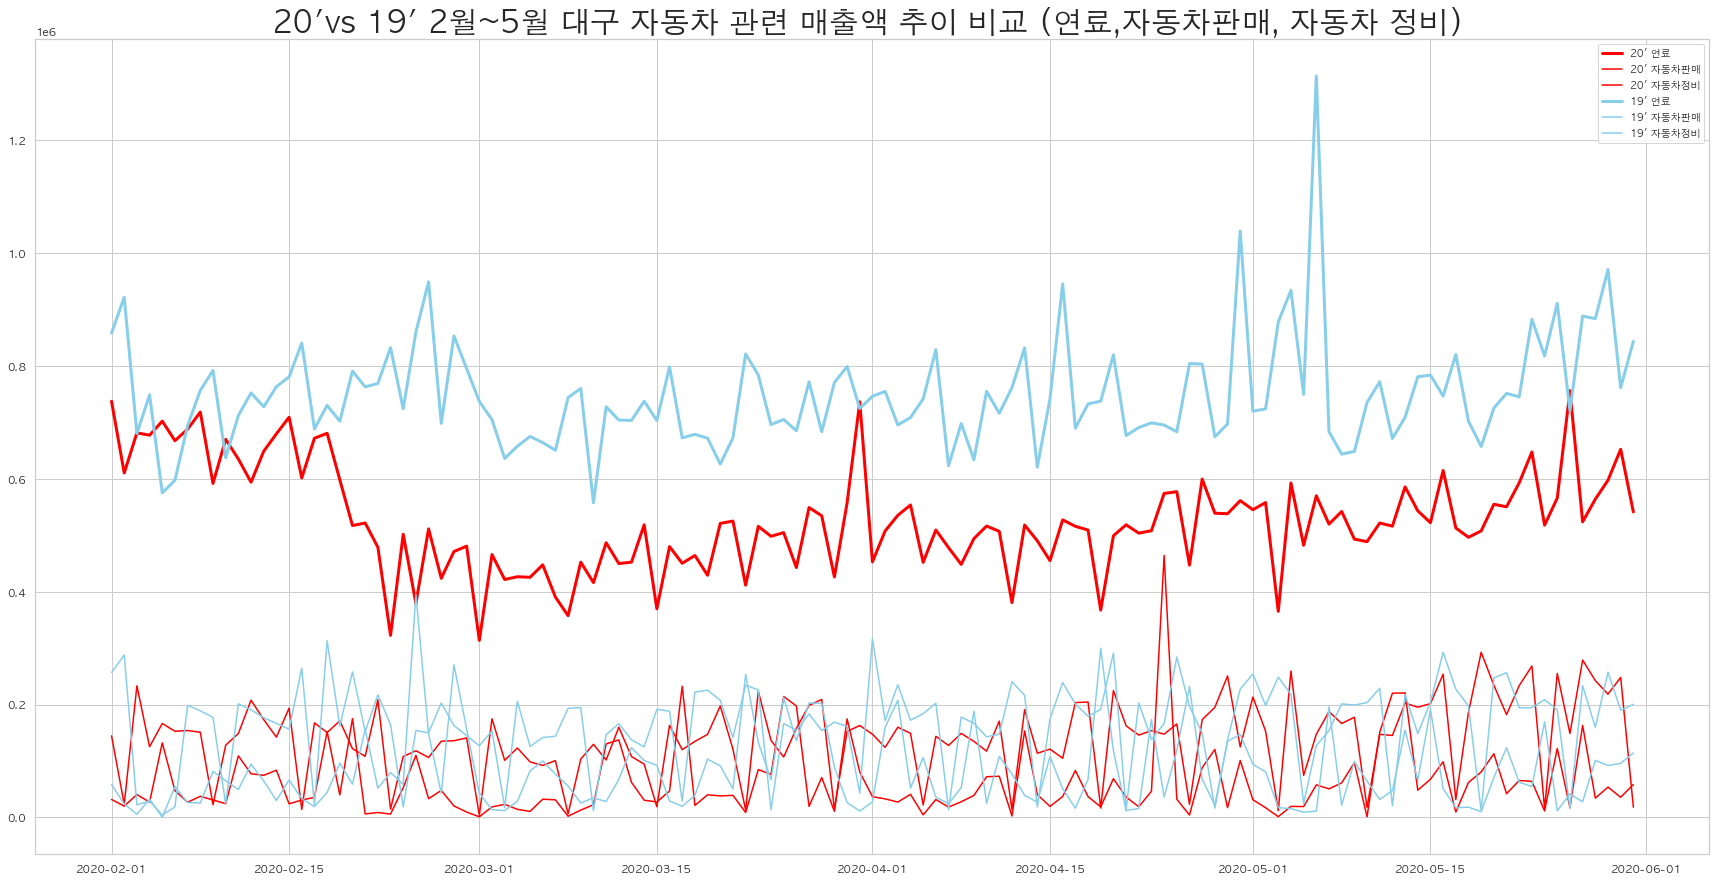

In [35]:
#업종별 묶음 
#전체 업종 

f,ax =plt.subplots(figsize=(30,15)) 


#20'vs'19 대구 이동 관련 매출 
#2020
sns.lineplot(data=dg_ind_33["USE_AMT"],ax=ax, label="20' 연료",color="red", linewidth=3)
sns.lineplot(data=dg_ind_60["USE_AMT"],ax=ax, label="20' 자동차판매",color="red")
sns.lineplot(data=dg_ind_62["USE_AMT"],ax=ax, label="20' 자동차정비",color="red")
#2019
sns.lineplot(data=dg_2019_33["USE_AMT"],ax=ax, label="19' 연료",color="skyblue", linewidth=3)
sns.lineplot(data=dg_2019_60["USE_AMT"],ax=ax, label="19' 자동차판매",color="skyblue")
sns.lineplot(data=dg_2019_62["USE_AMT"],ax=ax, label="19' 자동차정비",color="skyblue")
ax.set_title("20'vs 19' 2월~5월 대구 자동차 관련 매출액 추이 비교 (연료,자동차판매, 자동차 정비) ", fontsize=30)

ax.legend(fontsize=10)

plt.show()

* 레저 업소 : 실내골프장, 테니스장, 볼링장, 스키장, 수영장, 당구장, 노래방, 종합레저타운/놀이동산, 비디오방, 스포츠클럽, 카지노, 유선TV, 전자오락실,PC게임방 
* 레저 용품 : 음반, 악기, 피아노, 운동경기,레져용품,레저스포츠,자전거 등 
* [질문] 운동시설과 다른 것들이 분리가 안 되어 있다 - 이걸 쓸 수 있을까요? 

# 대구 Zoom in : 연령별

# 📌대구 2월18일~3월7일 확진자수와 매출을 비교하자

In [36]:
#대구 지역 코로나19 확진자 추이 2/18~3/7) #출처:질본발표자료

dg_confirmed = [1,10,23,50,70,148,141,56,178,340,297,741,514,512,520,405,321,367,390] 
hot = pd.date_range(start="2020-02-18",end="2020-03-07")

dg_hot = pd.DataFrame(dg_confirmed,hot)

In [37]:
#2019와 2020 분리
df_resident_2019=df_resident[df_resident["date"] <= "2019-05-31"]
df_resident_2020=df_resident[df_resident["date"] >= "2020-02-01"] 
df_resident_2020.set_index("date")

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
date,,,,,,,,
2020-02-01,20200201,110,517,10,F,25,5,79
2020-02-01,20200201,110,517,10,M,20,16,1054
2020-02-01,20200201,110,517,10,M,25,11,269
2020-02-01,20200201,110,517,10,M,30,11,448
2020-02-01,20200201,110,517,10,M,45,5,343
...,...,...,...,...,...,...,...,...
2020-05-31,20200531,350,720,81,M,45,19,127
2020-05-31,20200531,350,720,81,M,50,33,211
2020-05-31,20200531,350,720,81,M,55,9,61


In [38]:
#2020년 데이터 중에서 대구만 추출 (GU_CD 110,260)

dg_cd =[110,260] 
rows_dg_cd=df_resident_2020[df_resident_2020["GU_CD"].isin(dg_cd)]
rows_dg_cd.set_index("date")

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
date,,,,,,,,
2020-02-01,20200201,110,517,10,F,25,5,79
2020-02-01,20200201,110,517,10,M,20,16,1054
2020-02-01,20200201,110,517,10,M,25,11,269
2020-02-01,20200201,110,517,10,M,30,11,448
2020-02-01,20200201,110,517,10,M,45,5,343
...,...,...,...,...,...,...,...,...
2020-05-31,20200531,260,690,81,M,50,126,2557
2020-05-31,20200531,260,690,81,M,55,115,2583
2020-05-31,20200531,260,690,81,M,60,55,2306


In [39]:
#대구지역 한정 매출액
dg_amt_by_date_20=rows_dg_cd.groupby("date")[["USE_AMT"]].sum()
dg_amt_by_date_20.columns=["dg_amt"]

dg_amt_by_date_20_hot=dg_amt_by_date_20["dg_amt"].loc["2020-02-18":"2020-03-07"]

In [40]:
#2020년 데이터를 date로 그루핑,서울+대구 날짜별 카드사용량(USE_AMT)의 합계를 도출
amt_by_date_2020 = df_resident_2020.groupby("date")[["USE_AMT"]].sum()

In [41]:
#대구 확진자 데이터와 서울대구매출총액을 join

dg_hot.reset_index()

amt_by_date_2020_hot= pd.merge(amt_by_date_2020, dg_hot, left_index=True, right_index=True)
amt_by_date_2020_hot.columns=["seoul+dg+amt","dg_confirmed"]

amt_by_date_2020_hot_2= pd.merge(amt_by_date_2020_hot,dg_amt_by_date_20["dg_amt"].loc["2020-02-18":"2020-03-07"],left_index=True,right_index=True)
#amt_by_date_2020_hot_2

print(amt_by_date_2020_hot)

            seoul+dg+amt  dg_confirmed
2020-02-18      24861374             1
2020-02-19      24730948            10
2020-02-20      24219364            23
2020-02-21      24995464            50
2020-02-22      24511319            70
2020-02-23      14895237           148
2020-02-24      21834724           141
2020-02-25      22291521            56
2020-02-26      22717553           178
2020-02-27      21942841           340
2020-02-28      22474612           297
2020-02-29      21057044           741
2020-03-01      14382310           514
2020-03-02      18775361           512
2020-03-03      18943703           520
2020-03-04      17879267           405
2020-03-05      18502339           321
2020-03-06      20628884           367
2020-03-07      21825626           390


# 📌연령별 카드매출 

In [42]:
#서울만 추출
sl_cd = [140,350]
rows_sl=df_resident_2020[df_resident_2020["GU_CD"].isin(sl_cd)] 
rows_sl.set_index("date")

print(rows_dg_cd)
print(rows_sl)

           STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  \
1310606  20200201    110      517          10      F      25        5   
1310607  20200201    110      517          10      M      20       16   
1310608  20200201    110      517          10      M      25       11   
1310609  20200201    110      517          10      M      30       11   
1310610  20200201    110      517          10      M      45        5   
...           ...    ...      ...         ...    ...     ...      ...   
2534696  20200531    260      690          81      M      50      126   
2534697  20200531    260      690          81      M      55      115   
2534698  20200531    260      690          81      M      60       55   
2534699  20200531    260      690          81      M      65       93   
2534700  20200531    260      690          92      M      50        5   

         USE_AMT       date  
1310606       79 2020-02-01  
1310607     1054 2020-02-01  
1310608      269 2020-02-01  
131

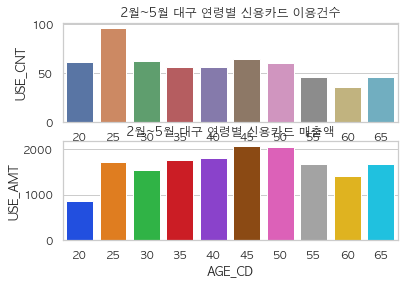

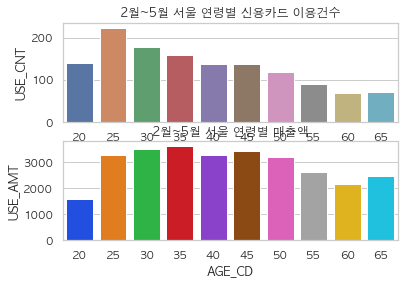

In [43]:
dg_cnt_by_age=rows_dg_cd.groupby("AGE_CD")[["USE_CNT"]].mean()
sl_cnt_by_age=rows_sl.groupby("AGE_CD")[["USE_CNT"]].mean()

dg_amt_by_age=rows_dg_cd.groupby("AGE_CD")[["USE_AMT"]].mean()
sl_amt_by_age=rows_sl.groupby("AGE_CD")[["USE_AMT"]].mean()

#dg
f, (ax1,ax2) = plt.subplots(2,1)
sns.barplot(dg_cnt_by_age.index, dg_cnt_by_age["USE_CNT"],ax=ax1)
sns.barplot(dg_amt_by_age.index, dg_amt_by_age["USE_AMT"],palette="bright",ax=ax2) 
ax1.set_title("2월~5월 대구 연령별 신용카드 이용건수")
ax2.set_title("2월~5월 대구 연령별 신용카드 매출액")
plt.show()


#dg_amt
#f,ax4 = plt.subplots()
#ax4 = sns.barplot(dg_amt_by_age.index, dg_amt_by_age["USE_AMT"],palette="bright") 
#ax4.set_title("2월~5월 대구 연령별 매출액")
#plt.show() 


#sl
f, (ax3,ax4) = plt.subplots(2,1)
sns.barplot(sl_cnt_by_age.index, sl_cnt_by_age["USE_CNT"],ax=ax3) 
ax3.set_title("2월~5월 서울 연령별 신용카드 이용건수")
sns.barplot(sl_amt_by_age.index, sl_amt_by_age["USE_AMT"], palette="bright",ax=ax4) 
ax4.set_title("2월~5월 서울 연령별 매출액")
plt.show()







# 📌20' 2/18일~3/7 매출총액 & 대구 확진자수

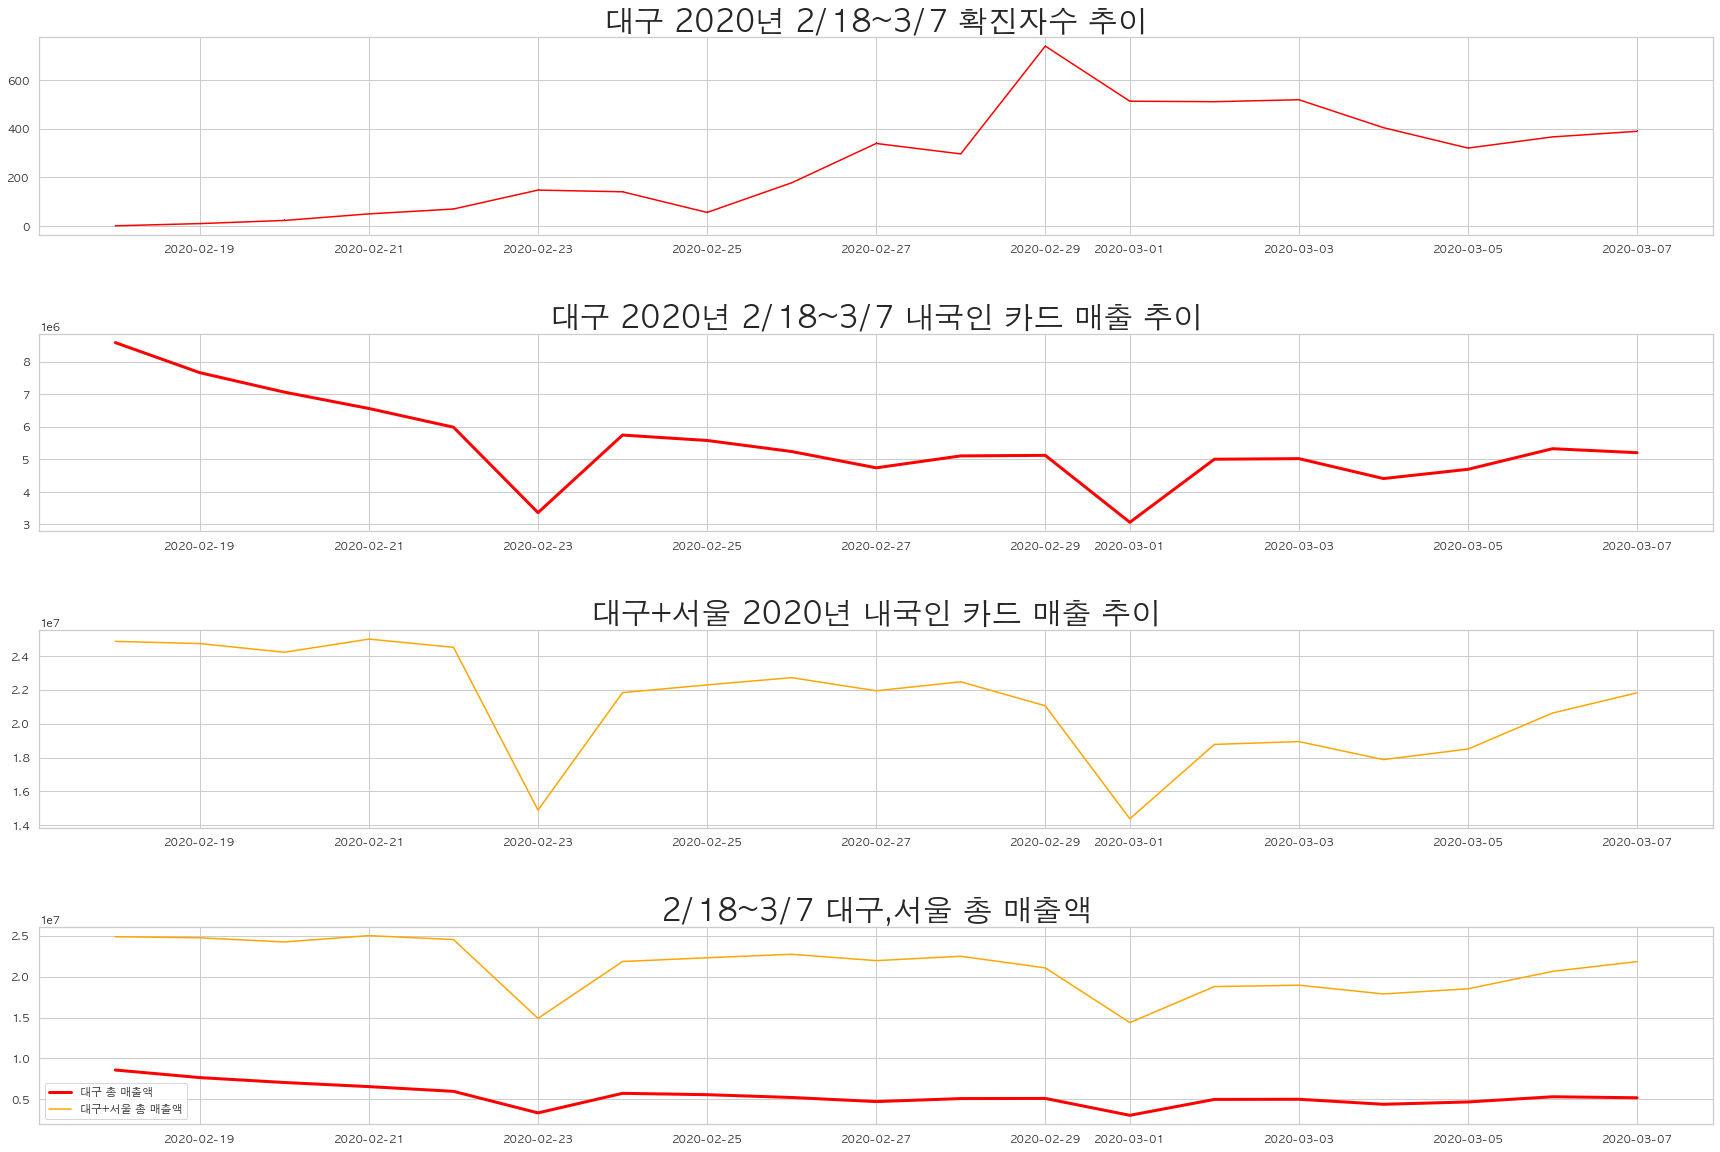

In [46]:
f,(ax1,ax2,ax3,ax4)=plt.subplots(4,1, figsize=(30,20), gridspec_kw={"height_ratios" : [1,1,1,1], "hspace":0.5})

#대구 2월18일~3월7일 확진자수 추이 
sns.lineplot(data=amt_by_date_2020_hot["dg_confirmed"],ax=ax1,color="red",linestyle='--', marker=',')
ax1.set_title("대구 2020년 2/18~3/7 확진자수 추이",fontsize=30)

#대구 2월18일~3월7일 매출 추이
sns.lineplot(data=dg_amt_by_date_20["dg_amt"].loc["2020-02-18":"2020-03-07"], ax=ax2, color="red",linewidth=3)
ax2.set_title("대구 2020년 2/18~3/7 내국인 카드 매출 추이",fontsize=30)

#서울+대구 2020년 매출 추이 
sns.lineplot(data=amt_by_date_2020_hot["seoul+dg+amt"],ax=ax3, color="orange")
ax3.set_title("대구+서울 2020년 내국인 카드 매출 추이",fontsize=30)

#세 그래프 한 번에 보기 
sns.lineplot(data=dg_amt_by_date_20["dg_amt"].loc["2020-02-18":"2020-03-07"], ax=ax4, color="red",linewidth=3, label="대구 총 매출액")
sns.lineplot(data=amt_by_date_2020_hot["seoul+dg+amt"],ax=ax4, color="orange", label="대구+서울 총 매출액")
ax4.set_title("2/18~3/7 대구,서울 총 매출액",fontsize=30)

ax4.legend()

plt.show()